In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Minimum_Wage_Data.csv',encoding='latin')

In [5]:
df

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
...,...,...,...,...,...,...,...,...,...
2745,2017,Virginia,7.25[c],[c],7.25000,7.25000,245.119583,7.41,7.41
2746,2017,Washington,11.00,NaN,11.00000,11.00000,245.119583,11.24,11.24
2747,2017,West Virginia,8.75,NaN,8.75000,8.75000,245.119583,8.94,8.94
2748,2017,Wisconsin,7.25,NaN,7.25000,7.25000,245.119583,7.41,7.41


In [6]:
sc= df.groupby(['State'])

In [7]:
sc.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
...,...,...,...,...,...,...,...,...,...
270,1972,Virginia,...,NaN,0.00000,0.00000,41.816667,0.00,0.00
271,1972,Washington,1.60,NaN,1.60000,1.60000,41.816667,9.58,9.58
272,1972,West Virginia,1.20,NaN,1.20000,1.20000,41.816667,7.19,7.19
273,1972,Wisconsin,1.45 (b),(b),1.45000,1.45000,41.816667,8.68,8.68


In [8]:
pv = sc.get_group('Virginia').set_index('Year')

In [9]:

pv.replace(0,np.NaN).dropna(axis=1).describe()

,CPI.Average
count,50.000000
mean,138.828983
std,66.479996
min,34.783333
25%,84.537500
50%,142.387500
75%,193.689583
max,245.119583


In [10]:
pv.replace(0,np.NaN).dropna(axis=1).head()

,State,Table_Data,CPI.Average
Year,,,
1968,Virginia,...,34.783333
1969,Virginia,...,36.683333
1970,Virginia,...,38.825000
1971,Virginia,...,40.491667
1972,Virginia,...,41.816667


In [11]:
import pandas as pd
import numpy as np


act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))

act_min_wage.head()

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [12]:
min_wage_corr

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,Idaho,Indiana,Kentucky,Maine,Maryland,Massachusetts,Michigan,Minnesota,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,0.371515,0.352950,-0.569134,0.784052,0.487056,0.726248,0.606292,-0.384472,-0.142350,0.713637,0.817509,0.726091,0.521504,0.881634,0.454404,-0.002899,-0.181850,0.308927,-0.008462,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,-0.006833,-0.116454,0.427054,-0.059840,0.443650,-0.136325,0.113882,0.452996,0.180337,-0.005549,-0.192707,-0.093417,0.042759,-0.236279,0.413676,0.304853,0.296669,-0.212602,0.274903,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,0.623225,0.793831,-0.152946,0.716943,0.377899,0.942760,0.654850,-0.318507,0.232873,0.537317,0.559870,0.643447,0.538274,0.763132,0.450594,0.204418,0.072433,-0.315364,0.439329,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,0.521063,0.665580,0.497117,0.100846,-0.044345,0.469242,0.184005,-0.070367,0.736112,0.085357,-0.147020,0.045434,0.213957,0.002463,0.212403,0.314025,0.380842,-0.751726,0.648864,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,0.563913,0.731378,-0.179488,0.666562,0.553702,0.905269,0.747738,-0.357928,0.185571,0.632557,0.544013,0.529780,0.532646,0.776332,0.629509,0.114565,-0.047880,-0.332086,0.378981,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,0.708405,0.675197,0.200148,0.173486,0.039299,0.537094,0.142551,-0.419871,0.752485,0.559386,0.084726,0.185884,0.205677,0.291382,0.353903,0.183239,0.060297,-0.417430,0.509889,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,0.671306,0.664098,0.237560,0.375888,0.346281,0.656305,0.379898,-0.194168,0.734443,0.522322,0.186286,0.403857,0.453302,0.403779,0.528760,0.364079,0.240203,-0.475629,0.622831,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,0.338621,0.133628,-0.255126,0.622760,0.880329,0.416165,0.737017,0.034715,-0.250411,0.759930,0.905728,0.640923,0.610602,0.640902,0.790967,0.348061,0.157740,0.428560,0.004197,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,0.410607,0.262175,-0.501651,0.575916,0.824104,0.557130,0.690024,-0.281617,-0.185862,0.786231,0.848651,0.656598,0.549588,0.790776,0.717387,0.059348,-0.035121,0.398503,-0.125297,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,0.368091,0.311292,-0.141714,0.716290,0.517447,0.604166,0.487391,-0.181494,0.199326,0.679905,0.541385,0.702774,0.633616,0.651270,0.651703,0.207330,0.084575,0.046429,0.271349,0.517041,0.097491,0.7

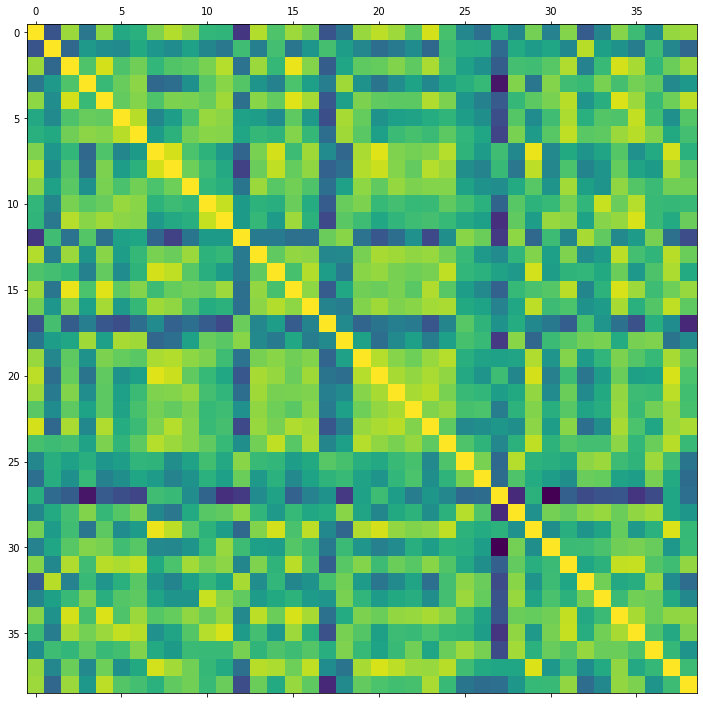

In [13]:
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 30,12

plt.matshow(min_wage_corr)